In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
dataset = pd.read_excel("dataset.xlsx")

In [38]:
dataset.shape

(100, 3)

In [47]:
dataset.describe()

,data1,data2,output
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [49]:
dataset.isnull().sum()

data1     0
data2     0
output    0
dtype: int64

In [39]:
print(dataset.columns.tolist())

['data1', 'data2', 'output']


In [40]:
dataset.head(10)

,data1,data2,output
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [41]:
dataset.tail()

,data1,data2,output
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


In [42]:

from sklearn.model_selection import train_test_split

In [44]:
X = dataset.loc[0:99, ["data1","data2"]]
Y = dataset.loc[0:99 ,["output"]]

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=0, train_size=0.80
)

In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

c:\Users\Balaji\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [62]:
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 80.00%


In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [66]:
cnf_matrix = confusion_matrix(Y_test, y_pred)
print(cnf_matrix)

[[8 0]
 [4 8]]


Text(0.5, 23.52222222222222, 'Predicted label')

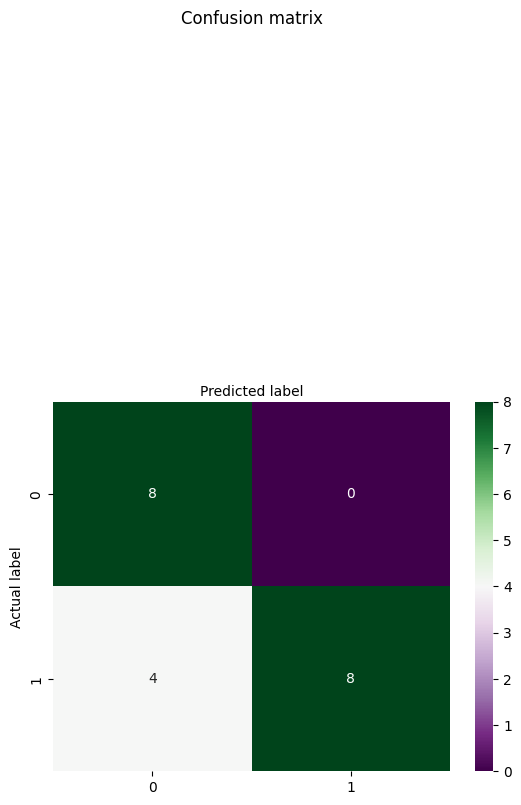

In [59]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PRGn", fmt="g")
ax.xaxis.set_label_position("top")
plt.title("Confusion matrix", y=2)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

array([[<AxesSubplot: title={'center': 'data1'}>,
        <AxesSubplot: title={'center': 'data2'}>],
       [<AxesSubplot: title={'center': 'output'}>, <AxesSubplot: >]],
      dtype=object)

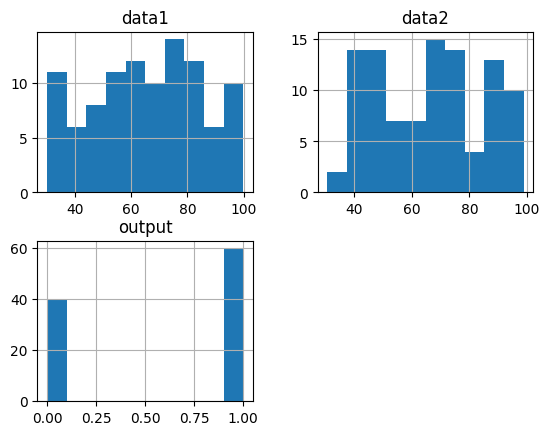

In [92]:
dataset.hist()

In [69]:
print("Precision score = ", precision_score(Y_test, y_pred))
print("Accuracy score = ", accuracy_score(Y_test, y_pred))
print("Recall score = ", recall_score(Y_test, y_pred))

Precision score =  1.0
Accuracy score =  0.8
Recall score =  0.6666666666666666


In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
classifier = KNeighborsClassifier(n_neighbors=13, metric="minkowski", p=2)
classifier.fit(X_train, Y_train)

c:\Users\Balaji\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=13)

In [80]:
Y_pred = classifier.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [82]:
cm = confusion_matrix(Y_test, Y_pred)
ac = accuracy_score(Y_test, Y_pred)

In [83]:
print(cm)
print("Accuracy:", ac)

[[8 0]
 [4 8]]
Accuracy: 0.8


In [84]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
clf_en.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [85]:
pred_y = clf_en.predict(X_test)

In [86]:
print("Train set score:{:.4f}".format(clf_en.score(X_train, Y_train)))
print("Test set score:{:.4f}".format(clf_en.score(X_test, Y_test)))

Train set score:0.9625
Test set score:0.8000


In [87]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, pred_y)
print(cm)

[[ 6  2]
 [ 2 10]]


In [91]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print("Accuracy :",accuracy_score(Y_test, pred_y))
print("precision :", precision_score(Y_test, pred_y))
print("recall :", recall_score(Y_test, pred_y))

Accuracy : 0.8
precision : 0.8333333333333334
recall : 0.8333333333333334
